# Signal Blocks

   <div style="display: flex; align-items: center; justify-content: space-between; gap: 2em; margin-top: 1em; margin-bottom: 1em;">
     <img src="../../_static/tikz/tutorial_0/signal_block.svg" style="width: 30%;">
   </div>

We define the following sets:
- $X_s \subset \mathbb{R}^n$ is the **signal state space**
- $U_s \subset \mathbb{R}^p$ is the **signal input space**
- $T \subset \mathbb{R}$ is the **time domain**

We define the following variables:
- $x_s \in X_s$ is the **signal state**
- $u_s \in U_s$ is the **signal input**
- $t \in T$ is **time**

We define the following functions:
- $f_s: X_s \times U_s \times T \to X_s$ is the **signal dynamics function**
- $h_s: X_s \times U_s \times T \to X_s$ is the **signal output function**

## Defining `SignalBlock` Objects

In ``pykal_core``, we can instantiate one or more independent``SignalBlock`` objects easily.

In [ ]:
from pykal_core.control_system import SignalBlock

# the SignalBlock constructor only requires one argument
sig_block = SignalBlock(b=["u"]) 

sig_block.__dict__

{'state_names': None,
 'input_names': None,
 'output_names': ['u'],
 'f': None,
 'h': None}

### Default Attributes

## Defining `SignalBlock` Functions

### Signal Dynamics 

#### Example: Fixed Setpoint Generator

#### Example: Variable Setpoint Generator

### Signal Output

#### Example: Fixed Sin Wave Generator 

We can define a basic sin wave function that depends only on time. 

In [2]:
import numpy as np
from numpy.typing import NDArray
def sin_wave_with_params(tk: float, amplitude:float = 1, period:float=2, phase:float=0) -> NDArray :
    return amplitude * np.sin(period * tk + phase)

We simulate the function to ensure it has the desired properties.

<Axes: xlabel='t'>

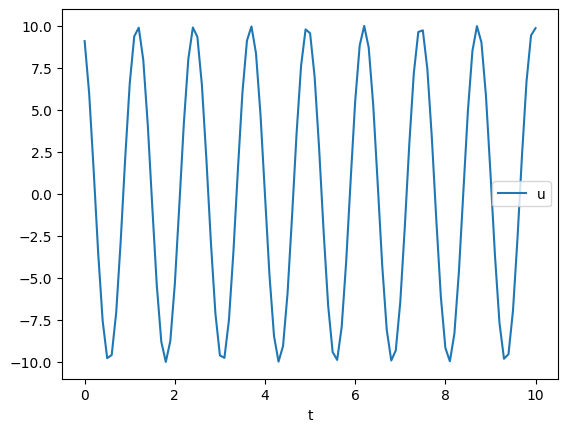

In [5]:
from pykal_core.utils import compute

sinwave_df = compute.Simulation.of_dynamical_system_over_time(h=sin_wave_with_params,
                                                              output_names = ["u"],
                                                              t_span=(0,10),
                                                              dt=0.1,
                                                              output_df = True,
                                                              kwarg_dict = {"amplitude":10,
                                                                            "period":5,
                                                                            "phase":2}
                                                              )
sinwave_df.plot()

Once satisfied, we can define a `Signal Block` that encapuslates this function.

In [ ]:
sin_wave_block = SignalBlock(signal_output_names=["u"],hs=sin_wave_with_params)
sin_wave_block.__dict__

{'state_names': None,
 'input_names': None,
 'output_names': ['u'],
 'fs': None,
 'hs': <function __main__.sin_wave_with_params(tk: float, amplitude=1, period=2, phase=0)>}

#### Example: Variable Sin Wave Generator

As before, we define a basic sin wave function:

In [ ]:
def sin_wave_with_params(tk: float, amplitude = 1, period=2, phase=0) :
    return amplitude * np.sin(period * tk + phase)

This time, we would like to be able to switch the sin wave on or off based on the value of a boolean input $u$, where $u=1$ turns it on and $u=0$ shuts it off.


In [ ]:
def sin_wave_with_params_on_or_off(tk:float,u:bool=1):
    if u:
        return sin_wave_with_params(tk)
    else:
        return 0

We simulate this function to ensure it has the desired properties.

<Axes: >

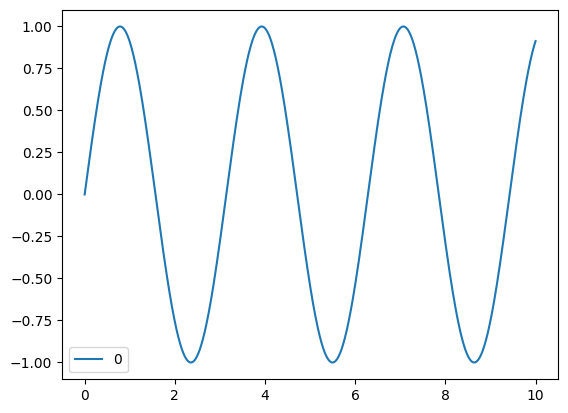

In [ ]:
from pykal_core.utils import compute

sinwave_df = compute.Simulation.of_signals(signal_function=sin_wave_with_params_on_or_off,
                                    t_span=(0,10),
                                    dt = .01,
                                    pass_kwarg_params=,
                                    output_df = True) 

sinwave_df.plot()

Once satisfied, we can define a `Signal Block` that encapuslates this function.

In [ ]:
sin_wave_on_off_block = SignalBlock(signal_output_names=["u"],hs=sin_wave_with_params_on_or_off)
sin_wave_on_off_block.__dict__

{'state_names': None,
 'input_names': None,
 'output_names': ['u'],
 'fs': None,
 'hs': <function __main__.sin_wave_with_params_on_or_off(tk: float, u: bool = 1)>}

[<- The Feedback System](the_feedback_system) | [Tutorial](tutorials) | [Function Blocks ->](function_blocks)